In [ ]:
"""Copyright (c) Meta Platforms, Inc. and affiliates."""

import os

# Use PyTorch backend for geomstats
os.environ["GEOMSTATS_BACKEND"] = "pytorch"

import os.path as osp
import sys
from datetime import datetime
from omegaconf import DictConfig, OmegaConf
import hydra
import logging
import json
from glob import glob
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import LearningRateMonitor

from manifm.datasets import get_loaders
from manifm.model_pl import ManifoldFMLitModule

In [ ]:
import numpy as np

data_read_in = np.load("/gpfs/gibbs/project/dijk/jo548/recordings_for_flow.npy",allow_pickle=True)
# data_read_in is an array containing a dict, we extract this dict into data
data = data_read_in.item()

In [ ]:
print("The keys of data are:")
print(data.keys())
print("These are the names of the mice.")
print("The keys in one of the mice are:")
print(data["SLgfp02"].keys())
print(f"These correspond to {len(data['SLgfp02'].keys())} days.")
print("The first day data of this mouse has shape:")
print(data["SLgfp02"][0].shape)
print("This is different from the second day:")
print(data["SLgfp02"][1].shape)
print("The fourth has None Type:")
print(data["SLgfp02"][3])

In [ ]:
type(data["SLgfp01"][0])

In [ ]:
train_loader, val_loader, test_loader = get_loaders(cfg)

# Bunny example

In [1]:
from data.synthesize_mesh_data import create_simple_bunny

create_simple_bunny(replace=True)

In [2]:
import numpy as np
# data = np.load("/home/sh2748/riemannian-fm/data/mesh/bunny_simple.npy")
data = np.load("/home/sh2748/riemannian-fm/data/mesh/bunny_v.npy")
data_f = np.load("/home/sh2748/riemannian-fm/data/mesh/bunny_f.npy")

In [3]:
data.shape, data_f.shape

((2502, 3), (5000, 3))

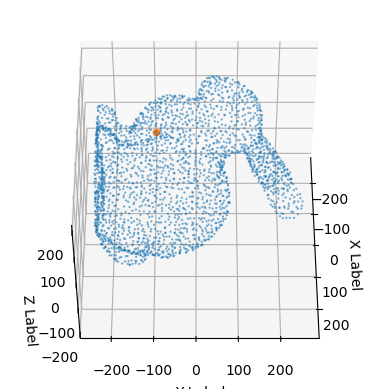

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], alpha=0.5, s=0.5)
ax.view_init(elev=50, azim=0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(data[234][0], data[234][1], data[234][2])

plt.show()

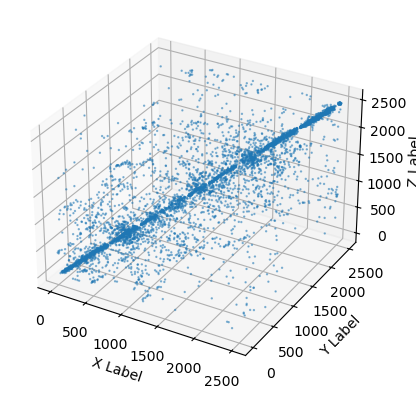

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_f[:,0], data_f[:,1], data_f[:,2], alpha=0.5, s=0.5)
# ax.view_init(elev=50, azim=0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [2]:
import igl
import numpy as np
import trimesh
import meshplot as mp

# Load the original mesh using trimesh
mesh = trimesh.load("/home/sh2748/riemannian-fm/data/mesh/bunny_simp.obj")

# Extract vertices and faces
v = mesh.vertices
f = mesh.faces

# Perform Loop subdivision to upsample the mesh using igl
v_upsampled, f_upsampled = igl.loop(v, f)

# Visualize the original mesh
p = mp.plot(v, f, c=np.array([0.8, 0.8, 0.8]), shading={"flat": False}, return_plot=True)
p.add_edges(v, f)

# Visualize the upsampled mesh in a new plot
p2 = mp.plot(v_upsampled, f_upsampled, c=np.array([0.8, 0.8, 0.8]), shading={"flat": False}, return_plot=True)
p2.add_edges(v_upsampled, f_upsampled)


/home/sh2748/.conda/envs/riemanfm/lib/python3.9/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  warnings.warn(
/home/sh2748/.conda/envs/riemanfm/lib/python3.9/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.082931…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.09375,…

1